In [61]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [14]:
### read csv from url

In [15]:
url= 'https://tinyurl.com/4tfzdbmh'
data = pd.read_csv(url)

In [16]:
data[["MMM"]]

,MMM
0,29.847043
1,28.661131
2,30.122175
3,31.877325
4,32.509812
...,...
4799,200.300000
4800,199.160000
4801,200.210000
4802,201.120000


In [17]:
### read csv from pandas web data reader


In [21]:
pip install pandas-datareader

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
data_web=web.DataReader(["GE"], "yahoo",start="2019-01-01",end = "2019-02-01")

In [23]:
data_web.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
Date,,,,,,
2019-01-02,61.171005,61.923077,62.923077,57.000000,57.384617,16816033
2019-01-03,61.246998,62.000000,63.076923,59.846153,61.692307,15983370
2019-01-04,62.538807,63.307693,63.538464,61.384617,63.000000,15610894
2019-01-07,66.414230,67.230766,67.615387,63.769230,65.769234,23358972
2019-01-08,65.046432,65.846153,69.538460,65.538460,68.538460,19107452


In [24]:
data_web.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,67.505707,68.335664,69.622377,66.395105,67.737762,1.565574e+07
std,3.978016,4.026927,4.553486,4.233685,4.328291,7.473630e+06
min,61.171005,61.923077,62.923077,57.000000,57.384617,9.410167e+06
25%,65.939306,66.750002,68.173077,65.365385,65.923079,1.178550e+07
50%,67.630051,68.461540,69.192307,66.576923,68.153843,1.433111e+07
75%,68.693886,69.538460,70.576921,67.365383,68.942305,1.589025e+07
max,77.432587,78.384613,82.846153,76.615387,78.461540,4.532314e+07


In [25]:
data_web.shape

(22, 6)

In [26]:
pd.set_option("precision",3) # za decimalna mesta

In [27]:
data_web.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
count,22.000,22.000,22.000,22.000,22.000,2.200e+01
mean,67.506,68.336,69.622,66.395,67.738,1.566e+07
std,3.978,4.027,4.553,4.234,4.328,7.474e+06
min,61.171,61.923,62.923,57.000,57.385,9.410e+06
25%,65.939,66.750,68.173,65.365,65.923,1.179e+07
50%,67.630,68.462,69.192,66.577,68.154,1.433e+07
75%,68.694,69.538,70.577,67.365,68.942,1.589e+07
max,77.433,78.385,82.846,76.615,78.462,4.532e+07


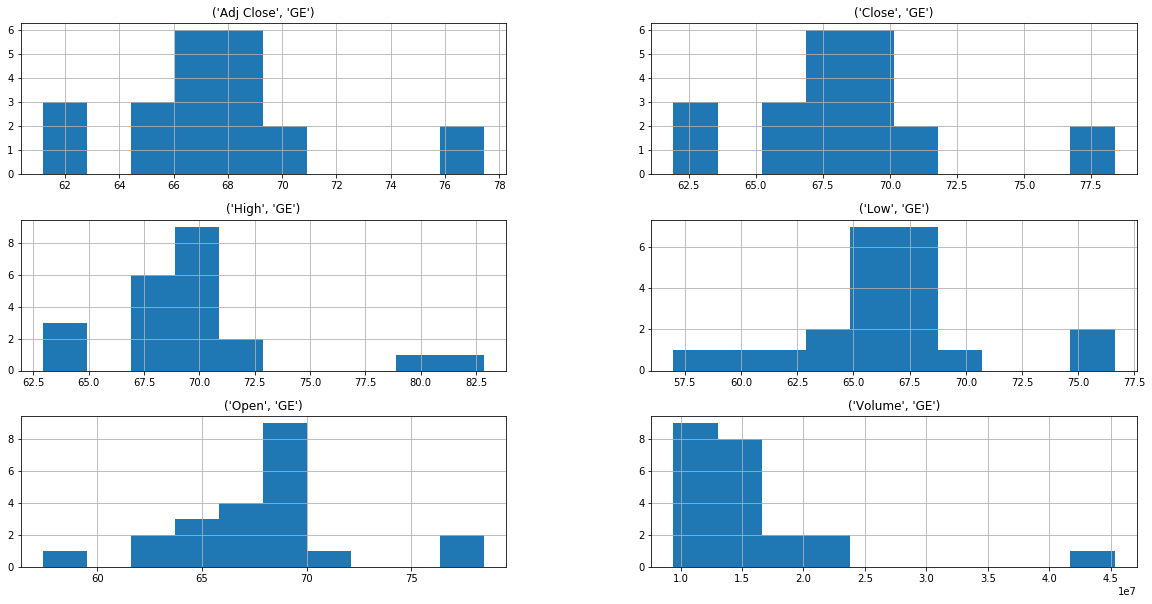

In [28]:
from matplotlib import pyplot
data_web.hist(figsize=(20,10));
pyplot.show()

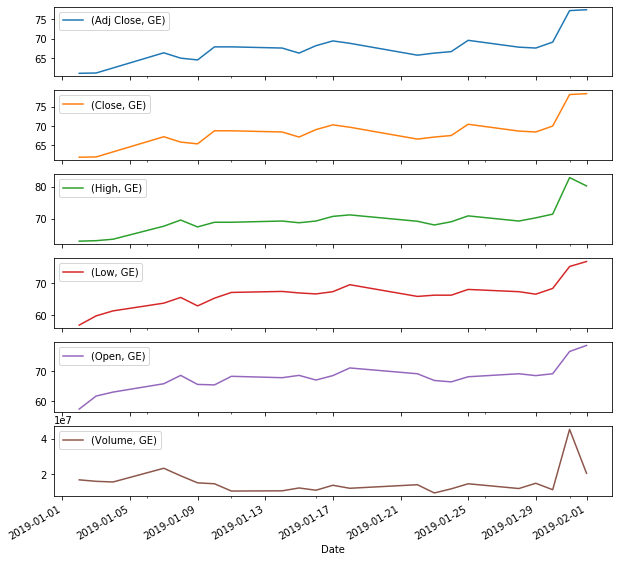

In [29]:
data_web.plot(subplots = True,figsize=(10,10));

In [30]:
person_data = pd.read_csv("person_data.csv")

In [31]:
person_data.dropna(axis=0) # sve redove gde je 0

,name,age,height
0,marija,12.0,120.0
1,jovana,20.0,160.0
2,alex,45.0,165.0


In [32]:
person_data.fillna(0)

,name,age,height
0,marija,12.0,120.0
1,jovana,20.0,160.0
2,alex,45.0,165.0
3,ivo,50.0,0.0
4,Pero,0.0,180.0


In [33]:
person_data

,name,age,height
0,marija,12.0,120.0
1,jovana,20.0,160.0
2,alex,45.0,165.0
3,ivo,50.0,NaN
4,Pero,NaN,180.0


In [34]:
person_data.columns =pd.Index(map(lambda col: col.strip(),person_data.columns)) # argument vraca podatke 

In [35]:
person_data["age"]=person_data["age"].fillna(person_data["age"].mean())

In [36]:
list(map(lambda x: x/2,[1,2,3,4,5]))

[0.5, 1.0, 1.5, 2.0, 2.5]

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,5))
pd.DataFrame(scaler.fit_transform(data_web),columns = data_web.columns,index=data_web.index)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,GE,GE,GE,GE,GE,GE
Date,,,,,,
2019-01-02,1.000,1.000,1.000,1.000,1.000,1.825
2019-01-03,1.019,1.019,1.031,1.580,1.818,1.732
2019-01-04,1.336,1.336,1.124,1.894,2.066,1.691
2019-01-07,2.290,2.290,1.942,2.380,2.591,2.554
2019-01-08,1.953,1.953,2.328,2.741,3.117,2.080
2019-01-09,1.841,1.841,1.896,2.208,2.547,1.636
2019-01-10,2.664,2.664,2.189,2.694,2.518,1.579
2019-01-11,2.664,2.664,2.189,3.055,3.058,1.120


Standard Normal Scaler
Uniform distirtibution


In [71]:
Y= pd.DataFrame(np.random.randint(-50,-25,10000))

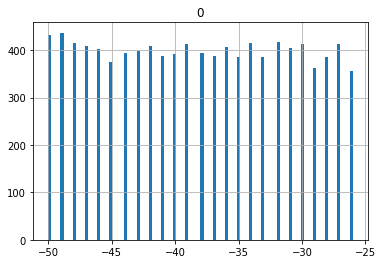

In [72]:
Y.hist(bins=100);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d0ba09310>]],
      dtype=object)

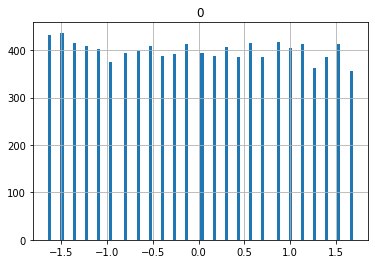

In [73]:
scaler_uniform = StandardScaler().fit(Y)
standard_Y = pd.DataFrame(scaler_uniform.fit_transform(Y))
standard_Y.hist(bins=100)

Normal distribution

In [56]:
X = pd.DataFrame(np.random.normal(10, 2, size=10000))

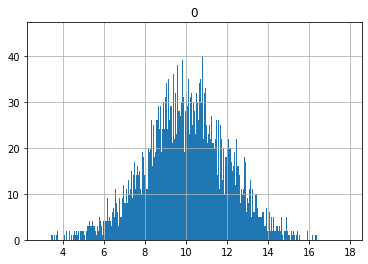

In [57]:
X.hist(bins=1000);

In [59]:
X.describe()

,0
count,10000.000
mean,9.996
std,2.026
min,2.982
25%,8.648
50%,10.002
75%,11.348
max,17.835


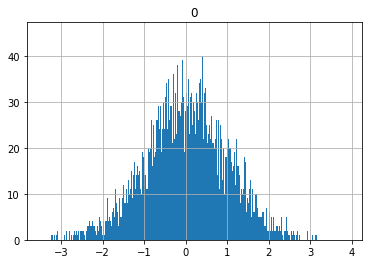

In [63]:
scaler = StandardScaler().fit(X)
standradised_X = pd.DataFrame(scaler.fit_transform(X))
standradised_X.hist(bins=1000);

Normalizer scaler

In [80]:
normalizer = Normalizer().fit(X)
normalized_X = pd.DataFrame(normalizer.fit_transform(X))
pd.DataFrame(normalized_X).value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [81]:
normalized_X[0].value_counts()

-1.0    8143
 1.0    1680
 0.0     177
Name: 0, dtype: int64

In [82]:
X[X[0]> 0].count()

0    1680
dtype: int64

In [91]:
Z =pd.DataFrame([{"x": 0,"y":100},
                 {"x": 0,"y":-10},
                 {"x": 0,"y":0},
                 {"x": 0,"y":0},
                 {"x": 70,"y":50},
                 {"x": 70,"y":-50}
                 ])

In [92]:
normalizer_Z = Normalizer().fit(Z)
normalizer_Z = pd.DataFrame(normalizer_Z.fit_transform(Z))
normalizer_Z

,0,1
0,0.000,1.000
1,0.000,-1.000
2,0.000,0.000
3,0.000,0.000
4,0.814,0.581
5,0.814,-0.581
